<a href="https://colab.research.google.com/github/Tejas-Indrale/NLP-Sentiment-Analysis/blob/main/Analysis_of_Sea_Surface_Temperature_(SST)_Trends_in_the_Arabian_Sea_and_Bay_of_Bengal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import xarray as xr
dataset = xr.open_dataset('/content/drive/MyDrive/3/HadISST_sst.nc')
print(dataset)

<xarray.Dataset>
Dimensions:    (time: 1853, nv: 2, latitude: 180, longitude: 360)
Coordinates:
  * time       (time) datetime64[ns] 1870-01-16T11:59:59.505615234 ... 2024-0...
  * latitude   (latitude) float32 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
Dimensions without coordinates: nv
Data variables:
    time_bnds  (time, nv) float32 ...
    sst        (time, latitude, longitude) float32 ...
Attributes:
    Title:                      Monthly version of HadISST sea surface temper...
    description:                HadISST 1.1 monthly average sea surface tempe...
    institution:                Met Office Hadley Centre
    source:                     HadISST
    reference:                  Rayner, N. A., Parker, D. E., Horton, E. B., ...
    Conventions:                CF-1.0
    history:                    13/7/2024 converted to netcdf from pp format
    supplementary_information:  Updates and supplementary

In [ ]:
print("latitude range:", dataset['latitude'].values)
print("longitude range:", dataset['longitude'].values)

latitude range: [ 89.5  88.5  87.5  86.5  85.5  84.5  83.5  82.5  81.5  80.5  79.5  78.5
  77.5  76.5  75.5  74.5  73.5  72.5  71.5  70.5  69.5  68.5  67.5  66.5
  65.5  64.5  63.5  62.5  61.5  60.5  59.5  58.5  57.5  56.5  55.5  54.5
  53.5  52.5  51.5  50.5  49.5  48.5  47.5  46.5  45.5  44.5  43.5  42.5
  41.5  40.5  39.5  38.5  37.5  36.5  35.5  34.5  33.5  32.5  31.5  30.5
  29.5  28.5  27.5  26.5  25.5  24.5  23.5  22.5  21.5  20.5  19.5  18.5
  17.5  16.5  15.5  14.5  13.5  12.5  11.5  10.5   9.5   8.5   7.5   6.5
   5.5   4.5   3.5   2.5   1.5   0.5  -0.5  -1.5  -2.5  -3.5  -4.5  -5.5
  -6.5  -7.5  -8.5  -9.5 -10.5 -11.5 -12.5 -13.5 -14.5 -15.5 -16.5 -17.5
 -18.5 -19.5 -20.5 -21.5 -22.5 -23.5 -24.5 -25.5 -26.5 -27.5 -28.5 -29.5
 -30.5 -31.5 -32.5 -33.5 -34.5 -35.5 -36.5 -37.5 -38.5 -39.5 -40.5 -41.5
 -42.5 -43.5 -44.5 -45.5 -46.5 -47.5 -48.5 -49.5 -50.5 -51.5 -52.5 -53.5
 -54.5 -55.5 -56.5 -57.5 -58.5 -59.5 -60.5 -61.5 -62.5 -63.5 -64.5 -65.5
 -66.5 -67.5 -68.5 -69.5 -70.5 -71.

In [ ]:
# Define Arabian Sea and Bay of Bengal region
arabian_sea = dataset.sel(latitude=slice(13.33512866), longitude=slice(63.99431793))
bay_of_bengal = dataset.sel(latitude=slice(13.17322167), longitude=slice(87.45442549))


In [ ]:
# Resample data to annual means for the Arabian Sea and Bay of Bengal
arabian_sea_annual = arabian_sea['sst'].sel(time=slice('1980-01-01', '2021-12-31')).resample(time='1Y').mean()
bay_of_bengal_annual = bay_of_bengal['sst'].sel(time=slice('1980-01-01', '2021-12-31')).resample(time='1Y').mean()


In [ ]:
arabian_sea_annual_mean_spatial = arabian_sea_annual.mean(dim=['latitude', 'longitude'])
bay_of_bengal_annual_mean_spatial = bay_of_bengal_annual.mean(dim=['latitude', 'longitude'])

In [ ]:
# Check the Arabian Sea and Bay of Bengal annual means
print(arabian_sea_annual_mean_spatial)
print(bay_of_bengal_annual_mean_spatial)


<xarray.DataArray 'sst' (time: 42)>
array([ -37.33905 ,  -37.318317,  -53.87148 ,  -38.02663 ,  -40.35195 ,
        -41.2747  ,  -35.660194,  -66.83826 , -125.417946, -115.94161 ,
        -86.61859 ,  -91.126724, -107.31351 , -114.37126 , -112.20275 ,
        -99.96821 ,  -96.43724 ,  -72.77974 ,  -63.745796,  -93.64384 ,
        -68.726616,  -82.8112  ,  -60.991085,  -47.578983,  -94.31738 ,
       -104.0967  ,  -66.19259 ,  -64.607765,  -68.43059 ,  -53.625576,
        -42.33506 ,  -41.245796,  -64.70204 ,  -59.93667 ,  -78.12182 ,
        -68.20791 ,  -48.112057,  -82.98387 ,  -78.54282 ,  -50.76581 ,
        -47.53053 ,  -47.061985], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1980-12-31 1981-12-31 ... 2021-12-31
<xarray.DataArray 'sst' (time: 42)>
array([ -40.955124,  -39.708344,  -57.545166,  -40.246994,  -44.284588,
        -44.556145,  -39.82091 ,  -71.44421 , -130.18399 , -121.86124 ,
        -91.18153 ,  -94.246666, -109.5956  , -116.152   , -115.21954 ,
  

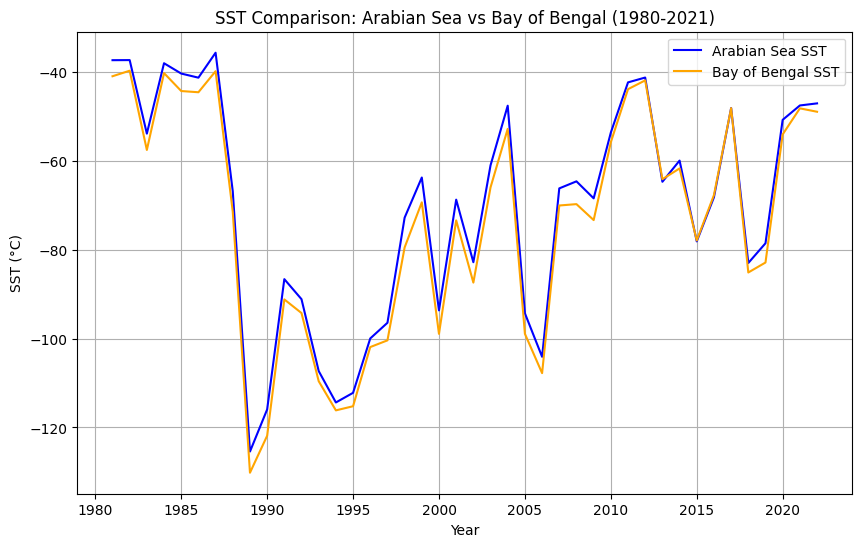

In [ ]:
import matplotlib.pyplot as plt

# Assuming you've already calculatitudeed the annual mean for both regions
# You need to average over latitudeitude and longitudegitude to get a 1D time series
arabian_sea_annual_mean_spatial = arabian_sea_annual.mean(dim=['latitude', 'longitude'])
bay_of_bengal_annual_mean_spatial = bay_of_bengal_annual.mean(dim=['latitude', 'longitude'])

# Plot the time series for Arabian Sea and Bay of Bengal
plt.figure(figsize=(10, 6))

# Now you can plot the spatially averaged data (1D) over time
plt.plot(arabian_sea_annual_mean_spatial.time, arabian_sea_annual_mean_spatial, label="Arabian Sea SST", color='blue')
plt.plot(bay_of_bengal_annual_mean_spatial.time, bay_of_bengal_annual_mean_spatial, label="Bay of Bengal SST", color='orange')

plt.title('SST Comparison: Arabian Sea vs Bay of Bengal (1980-2021)')
plt.xlabel('Year')
plt.ylabel('SST (°C)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
arabian_sea_avg_sst = arabian_sea_annual.mean().item()
bay_of_bengal_avg_sst = bay_of_bengal_annual.mean().item()

print(f"Average SST for Arabian Sea (1980-2021): {arabian_sea_avg_sst:.2f}°C")
print(f"Average SST for Bay of Bengal (1980-2021): {bay_of_bengal_avg_sst:.2f}°C")


Average SST for Arabian Sea (1980-2021): -70.27°C
Average SST for Bay of Bengal (1980-2021): -73.49°C


In [ ]:
import numpy as np
from scipy.stats import linregress

# Calculate trends for Arabian Sea and Bay of Bengal
def calculate_trend(time, sst):
    time_in_years = np.arange(len(time))
    # Convert the sst DataArray to a 1D numpy array
    sst_values = sst.values.flatten()
    slope, intercept, r_value, p_value, std_err = linregress(time_in_years, sst_values)
    return slope * 10  # per decade

# Calculate the spatial average first
arabian_sea_annual_mean = arabian_sea_annual.mean(dim=['latitude', 'longitude'])
bay_of_bengal_annual_mean = bay_of_bengal_annual.mean(dim=['latitude', 'longitude'])

arabian_sea_trend = calculate_trend(arabian_sea_annual_mean.time, arabian_sea_annual_mean)
bay_of_bengal_trend = calculate_trend(bay_of_bengal_annual_mean.time, bay_of_bengal_annual_mean)

print(f"Arabian Sea SST trend per decade: {arabian_sea_trend:.3f}°C/decade")
print(f"Bay of Bengal SST trend per decade: {bay_of_bengal_trend:.3f}°C/decade")

Arabian Sea SST trend per decade: 1.835°C/decade
Bay of Bengal SST trend per decade: 2.458°C/decade


In [ ]:
if arabian_sea_trend > bay_of_bengal_trend:
    print("The Arabian Sea has a larger SST trend.")
else:
    print("The Bay of Bengal has a larger SST trend.")


The Bay of Bengal has a larger SST trend.


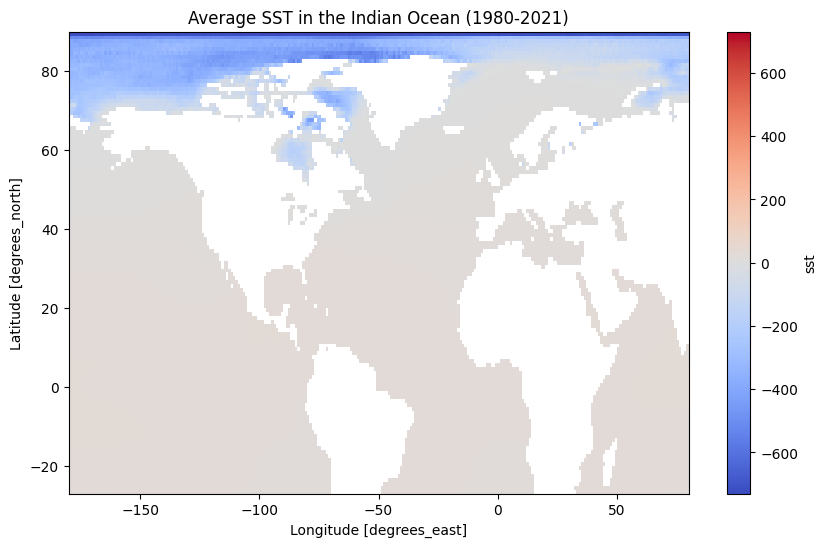

In [ ]:
# Select Indian Ocean region (roughly 20°S to 30°N, 40°E to 110°E)
indian_ocean = dataset.sel(latitude=slice(-27.26765), longitude=slice(79.60243))

# Calculate average SST for 1980-2021
indian_ocean_avg = indian_ocean['sst'].sel(time=slice('1980-01-01', '2021-12-31')).mean(dim='time')

# Plot spatial map of SST
indian_ocean_avg.plot(cmap='coolwarm', figsize=(10, 6))
plt.title('Average SST in the Indian Ocean (1980-2021)')
plt.show()
